# Making a bacterial tree of different types to be reused for the different analysis

<body> Mainly using the ete2 python library to make phylogenetic trees. </body>

In [1]:
import os
import sys
import cPickle as pickle

def loadPkl(fname):
    pklDir = '/home/jaggu/research/projectFiles/operons/pklFiles'
    f = os.path.join(pklDir,fname)
    db = pickle.load(open(f))
    return db

def savePkl(db,pklFname):
    pklDir = '/home/jaggu/research/projectFiles/operons/pklFiles'    
    f = os.path.join(pklDir,pklFname)
    pickle.dump(db,open(f,'w'))
    return 

In [2]:
import time

accNbr_taxID_dict = loadPkl('accNbr_taxID.dict.pkl')
taxID_accNbr_dict = loadPkl('taxID_accNbr.dict.pkl')

print "Dictionaries loaded",time.ctime()

Dictionaries loaded Wed Nov 18 11:53:50 2015


In [175]:
from ete2 import NCBITaxa, AttrFace, TreeStyle
ncbi = NCBITaxa()

def my_phyloTree(taxid_list):
    taxid2name = ncbi.get_taxid_translator(taxid_list)
    tree = ncbi.get_topology(taxid_list,rank_limit=None,collapse_subspecies=False)
    return tree

# custom layout: adds "rank" on top of branches, and sci_name as tip names
def my_layout(node):
    if getattr(node, "rank", None):
        rank_face = AttrFace("sci_name", fsize=12, fgcolor="#d55e00")
        node.add_face(rank_face, column=0, position="branch-top")
    if node.is_leaf():
        sciname_face = AttrFace("sci_name", fsize=12, fgcolor="#0072B2")
        node.add_face(sciname_face, column=0, position="branch-right")



In [147]:
from ete2 import NCBITaxa, AttrFace, TreeStyle
ncbi = NCBITaxa()

treeFig_dir = '/home/jaggu/research/projectFiles/operons/figures/treeFigures'
treeDir = '/home/jaggu/research/projectFiles/operons/tree_files'

allStrains_dir = '/home/jaggu/research/allGenomePttFiles'
allTaxID = list()
for path, dirnames, files in os.walk(allStrains_dir):
    for f in files:
        accNbr = os.path.split(f)[1][:-4]
        taxid = accNbr_taxID_dict.get(accNbr,None)
        allTaxID.append(taxid)
        
allTaxID = set(allTaxID)

ts = TreeStyle()
ts.layout_fn = my_layout
ts.show_leaf_name = False
ts.mode = "c"
#ts.arc_start = 0 # 0 degrees = 3 o'clock
#ts.arc_span = 180
tree = my_phyloTree(allTaxID)
#tree.show(tree_style=ts)
# Save Tree as figure
fname = 'allbacterial.tree.'
f = os.path.join(treeFig_dir,fname)
#tree.write(features=[],outfile=f,format=1)
tree.show(tree_style=ts)
#print "Rendered", f

In [63]:
# The idea is to get the statistics of the database I am working with; How many species in each category etc.
# The rank nomenclature is : 1. Root 2.Cellular organisms; 3.Superkingdom; 4.Phylum; 5.Class; 6.Order; 7.Family;
# 8.Genus; 9.Species; 10.Strains
# Will get the counts for ranks = Phylum, class, order, family, genus, species
import collections


def populateRANK(allTaxID_list):
    allRANK_dict = collections.defaultdict(list)
    for taxid in allTaxID_list:
        lineage = ncbi.get_lineage(taxid)
        rank_dict = ncbi.get_rank(lineage)
        for rankID,rankName in rank_dict.items():
            allRANK_dict[rankName].append(rankID)
    return allRANK_dict

def getAllTaxID():
    allStrains_dir = '/home/jaggu/research/allGenomePttFiles'
    allTaxID = list()
    for path, dirnames, files in os.walk(allStrains_dir):
        for f in files:
            accNbr = os.path.split(f)[1][:-4]
            taxid = accNbr_taxID_dict.get(accNbr,None)
            allTaxID.append(taxid)
    return allTaxID
       
def listMakeUp(idList):
    name_Counts_dict = collections.defaultdict(int)
    for taxid in idList:
        [name] = ncbi.translate_to_names([taxid])
        name_Counts_dict[name]+=1
    return name_Counts_dict

allTaxID = getAllTaxID()
allTaxID_list = list(set(allTaxID))
print "Number of organisms (unique Taxon ID) : ",len(allTaxID_list)
allRANK_dict = populateRANK(allTaxID_list)
rankNames = allRANK_dict.keys()

composition_dict = dict()
for rankName, allID in allRANK_dict.items():
    name_Counts_dict = listMakeUp(allID)
    composition_dict[rankName] = name_Counts_dict
    
allPhylum = allRANK_dict['phylum']
allClass = allRANK_dict['class']
allOrder = allRANK_dict['order']
allFamily = allRANK_dict['family']
allGenus = allRANK_dict['genus']
allSpecies = allRANK_dict['species']
print "Number of unique species",len(allSpecies)

print composition_dict['phylum']

Number of organisms (unique Taxon ID) :  2741
Number of unique species 2740
defaultdict(<type 'int'>, {u'Elusimicrobia': 2, u'Verrucomicrobia': 4, u'Chlamydiae': 107, u'Aquificae': 11, u'Actinobacteria': 278, u'Chlorobi': 11, u'Deferribacteres': 4, u'Nanoarchaeota': 1, u'Chrysiogenetes': 1, u'Cyanobacteria': 73, u'candidate division WWE3': 1, u'candidate division NC10': 1, u'Nitrospirae': 4, u'Dictyoglomi': 2, u'Cloacimonetes': 2, u'Thaumarchaeota': 6, u'Deinococcus-Thermus': 19, u'Proteobacteria': 1152, u'Acidobacteria': 8, u'Spirochaetes': 58, u'Candidatus Saccharibacteria': 2, u'Firmicutes': 582, u'Chloroflexi': 19, u'Planctomycetes': 7, u'Thermodesulfobacteria': 2, u'Fusobacteria': 8, u'Synergistetes': 5, u'Ignavibacteriae': 2, u'Crenarchaeota': 50, u'Korarchaeota': 1, u'Gemmatimonadetes': 1, u'Bacteroidetes': 98, u'Armatimonadetes': 1, u'Tenericutes': 86, u'Caldiserica': 1, u'Thermotogae': 15, u'Fibrobacteres': 1, u'Euryarchaeota': 106})


Composition dictionary keys :  [u'superkingdom', u'tribe', u'no rank', u'genus', u'subgenus', u'family', u'species subgroup', u'subphylum', u'subclass', u'species', u'class', u'species group', u'phylum', u'suborder', u'superphylum', u'subspecies', u'subfamily', u'order']
/home/jaggu/research/projectFiles/operons/figures/phylum_composition.bar.svg


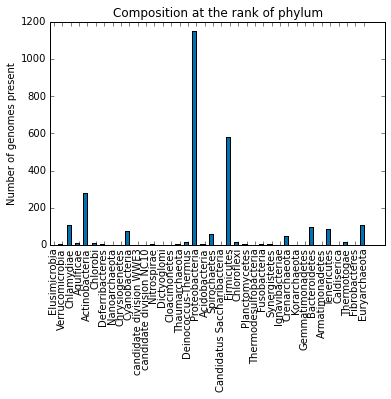

/home/jaggu/research/projectFiles/operons/figures/superkingdom_compositon.pie.svg


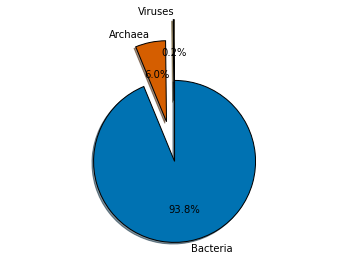

In [223]:
# Composition dictionary is made; Now I have to plot it as appropriate bar or pie chart
imgDir = '/home/jaggu/research/projectFiles/operons/figures'

#% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

print "Composition dictionary keys : ",composition_dict.keys()

def getXYList(rank):
    nameCount_list = list()
    name_counts_dict = composition_dict[rank]
    for name, counts in name_counts_dict.items():
        nameCount_list.append((name,counts))
    xNames,yList = zip(*nameCount_list)
    xList = np.arange(len(xNames))
    return xList, yList, xNames

rank = 'phylum'
width = 0.5
xList, yList, xNames = getXYList(rank)
rects = plt.bar(xList, yList, width, color='#0072B2')
plt.xticks(xList+width,xNames,rotation='vertical')
plt.ylabel('Number of genomes present')
plt.title('Composition at the rank of '+rank)
# Saving figure
fname = 'phylum_composition.bar.svg'
f = os.path.join(imgDir,fname)
print f
plt.savefig(f,dpi=300)
plt.show()

# Pie chart highlighting the different superkingdoms represented
rank = 'superkingdom'
xList, yList, xNames = getXYList(rank)
explode = (0.75, 0.5,0)  # only "explode" the 2nd slice (i.e. 'Hogs')
colorList = ['#E69F00','#D55E00','#0072B2']
plt.pie(yList,explode=explode,labels=xNames,autopct='%1.1f%%',shadow=True,startangle=90,colors=colorList)
plt.axis('equal')
# Saving figure
fname = 'superkingdom_compositon.pie.svg'
f = os.path.join(imgDir,fname)
print f
plt.savefig(f,dpi=300)
plt.show()


Keys in allRANK_dict [u'superkingdom', u'tribe', u'no rank', u'subfamily', u'subgenus', u'suborder', u'family', u'species subgroup', u'subclass', u'order', u'species group', u'phylum', u'subspecies', u'superphylum', u'species', u'subphylum', u'genus', u'class']
Number of organisms (unique Taxon ID) :  2741
[0 1] [u'Lactobacillales', u'Bacillales'] [221, 203]
424
/home/jaggu/research/projectFiles/operons/figures/Bacilli_composition.bar.svg


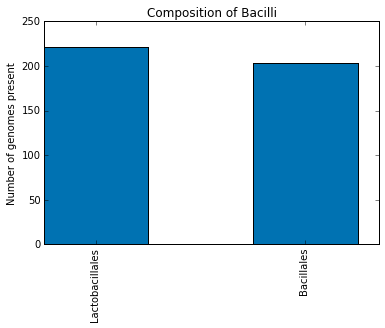

In [222]:
# Plotting a tree of the phylum - proteobacteria; Getting the taxon ID of all the species from the given phylum
treeFig_dir = '/home/jaggu/research/projectFiles/operons/figures/treeFigures'
treeDir = '/home/jaggu/research/projectFiles/operons/treeFiles'

print "Keys in allRANK_dict",allRANK_dict.keys()

def drawTree(tree):
    # Tree manipulation
    ts = TreeStyle()
    ts.layout_fn = my_layout
    ts.show_leaf_name = False
    ts.mode = "c"

    fname = 'proteobacteria.tree.newick'
    f = os.path.join(treeDir,fname)
    tree.write(outfile=f,format=1)
    print "Written",f

    #tree.render("%%inline",tree_style = ts)    
    #tree.show(tree_style=ts)

def get_taxonID_fromRank(rankID,allTaxID_list):
    filtered_list = list()
    for taxid in allTaxID_list:
        lineage = ncbi.get_lineage(taxid)
        if rankID in lineage:
            filtered_list.append(taxid)
    return filtered_list

def listMakeUp(idList):
    name_Counts_dict = collections.defaultdict(int)
    for taxid in idList:
        [name] = ncbi.translate_to_names([taxid])
        name_Counts_dict[name]+=1
    return name_Counts_dict

allTaxID = getAllTaxID()
allTaxID_list = list(set(allTaxID))
print "Number of organisms (unique Taxon ID) : ",len(allTaxID_list)

#print allRANK_dict['phylum']
def getComposition(name):
    xNames = list()
    yList = list()
    name2taxid = ncbi.get_name_translator([name])
    [rankID] = name2taxid[name]
    filtered_taxonList = get_taxonID_fromRank(rankID,allTaxID_list)
    tree = my_phyloTree(filtered_taxonList)
    for node in tree.get_children():
        taxid = int(node.name)
        [name] = ncbi.translate_to_names([taxid])
        xNames.append(name)
        yList.append(len(node.get_leaves()))
    xList = np.arange(len(xNames))
    return xList, yList, xNames

#name = 'Proteobacteria'
#name = 'Firmicutes'
name = 'Bacilli'
#name = 'Gammaproteobacteria'
#name = 'Enterobacteriaceae'
#name = 'Escherichia'
xList, yList, xNames = getComposition(name)
print xList, xNames, yList

print sum(yList)

width = 0.5
rects = plt.bar(xList, yList, width, color='#0072B2')
plt.xticks(xList+0.25,xNames,rotation='vertical')
plt.ylabel('Number of genomes present')
plt.title('Composition of '+name)
# Saving figure
fname = name + '_composition.bar.svg'
f = os.path.join(imgDir,fname)
print f
plt.savefig(f,dpi=300)
plt.show()

In [40]:
allTaxID_list = list(allTaxID)
type(allTaxID_list)
taxid = allTaxID_list[0]
lineage = ncbi.get_lineage(1420014)
print lineage
lineage = ncbi.get_lineage(taxid)
print lineage

print ncbi.translate_to_names([1239])
print ncbi.translate_to_names(lineage)
db = ncbi.get_rank(lineage)

for rankid,rankname in db.items():
    if rankname == 'phylum':
        print rankid, rankname

[1, 131567, 2, 1224, 1236, 91347, 543, 561, 562, 83333, 1420014]
[1, 131567, 2, 1239, 186801, 186802, 186807, 471826, 471827, 477974]
[u'Firmicutes']
[u'root', u'cellular organisms', u'Bacteria', u'Firmicutes', u'Clostridia', u'Clostridiales', u'Peptococcaceae', u'Candidatus Desulforudis', u'Candidatus Desulforudis audaxviator', u'Candidatus Desulforudis audaxviator MP104C']
1239 phylum


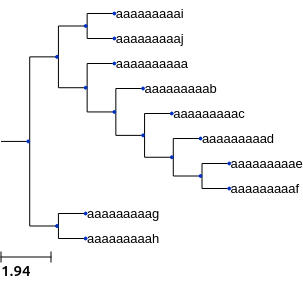

In [70]:
from ete2 import Tree, TreeStyle

t = Tree()
t.populate(10)
ts = TreeStyle()
ts.show_leaf_name = True
ts.branch_vertical_margin = 10 # 10 pixels between adjacent branches
t.render("%%inline",tree_style=ts)